In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [10]:
# Method for visualising the training for a model with various batch sizes and hidden units
def plot_training(training_result_file_path, output_plot_file_path, figure_title):
    
    # Load the dataframe
    training_results_df = pd.read_csv(training_result_file_path)
    
    # Construct a figure with 5 subplots for every number of hidden units possible
    figure, axis = plt.subplots(5,1, figsize = (8,22))
    figure.subplots_adjust(top=0.96)
    
    # Iterate over the possible hidden units
    for plot_id, hidden_units in enumerate([2**i for i in range(5,10)]):
        
        # Obtain the training results for the respective hidden unit
        n_model = training_results_df[training_results_df["hidden_units"] == hidden_units]
        
        colours = ["pink", "purple", "lightgreen", "orange"]
        
        # Iterate over 4 types of batch sizes
        for colour_id, batch_size in enumerate([2**i for i in range(5,9)]):
            
            # Obtain the training results for the respective batch size and hidden unit size
            single_training = n_model[n_model["batch_size"] == batch_size]
            
            # Obtain the epoch numbers 
            epochs = single_training["epochs"][1:]
            
            # Obtain the training and validation loss
            train_loss = single_training["train_loss"][1:]
            val_loss = single_training["val_loss"][1:]
            
            # Plot the training and validation loss
            axis[plot_id].plot(epochs, train_loss, label = f"{batch_size} batch size, train", color = colours[colour_id])
            axis[plot_id].plot(epochs, val_loss, label = f"{batch_size} batch size, validation",linestyle = "--", color = colours[colour_id])
            
            axis[plot_id].set_ylim([0, 5500])
            axis[plot_id].set_xlabel("Epochs")
            axis[plot_id].set_ylabel("Loss")
            axis[plot_id].legend()
            axis[plot_id].set_title(f"{hidden_units} hidden unit models' training process")
            
    figure.suptitle(figure_title)
    # Save the figure in a file
    figure.savefig(output_plot_file_path,bbox_inches='tight')
        

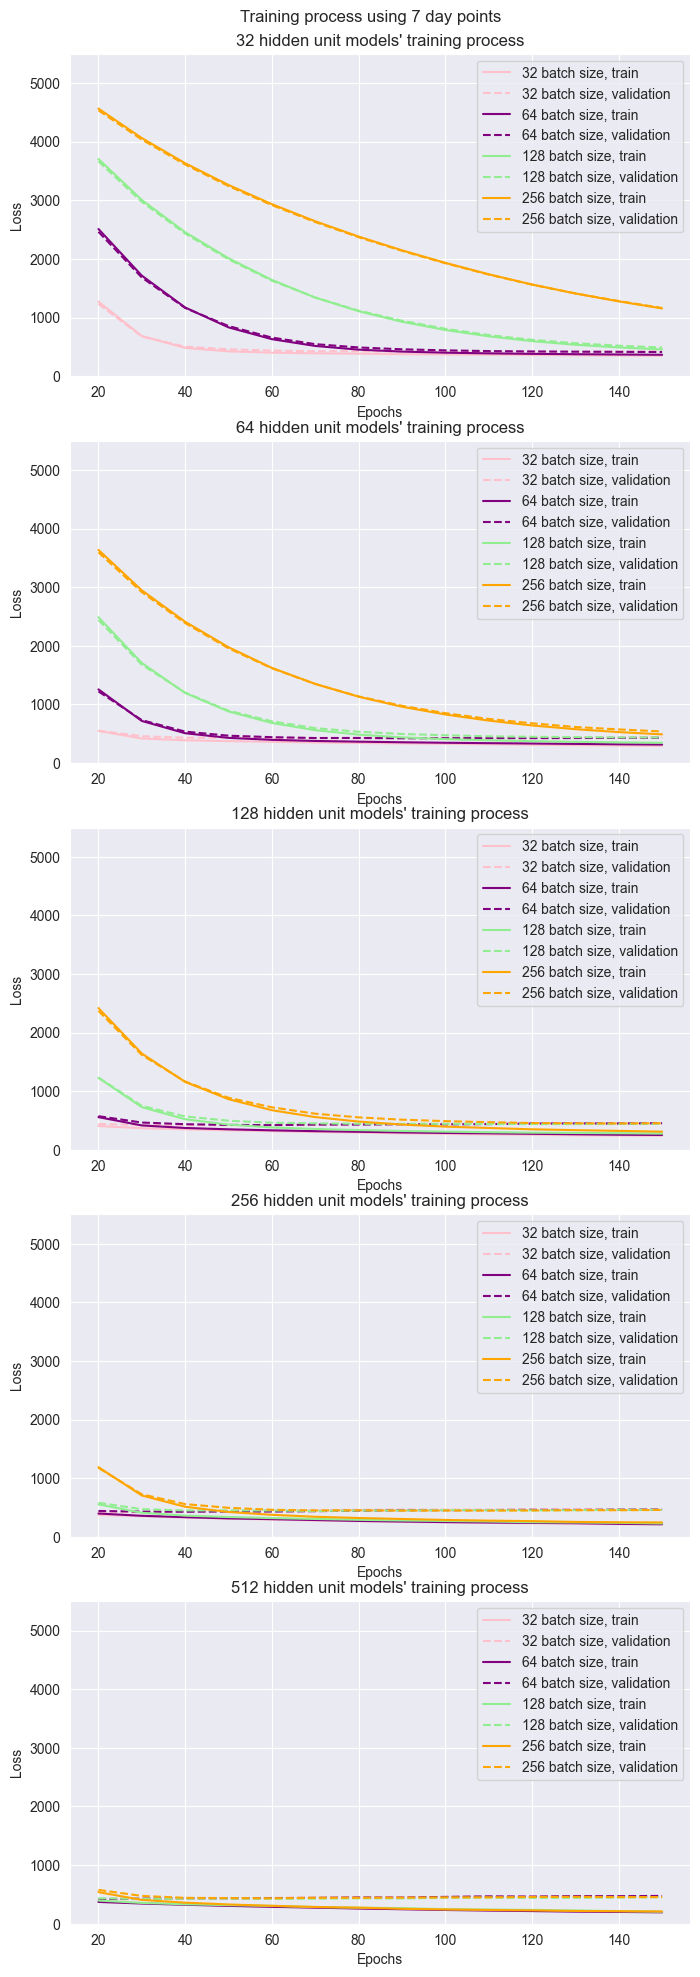

In [11]:
# Plot the training loss for Model 1
input_path = os.path.join("Data", "Hyperparameter_Search", 'hyperparameters_points.csv')
output_file = "hyperparameters_points_training.pdf"
output_path = os.path.join("report", "figures", output_file)
plot_training(input_path, output_path, "Training process using 7 day points")

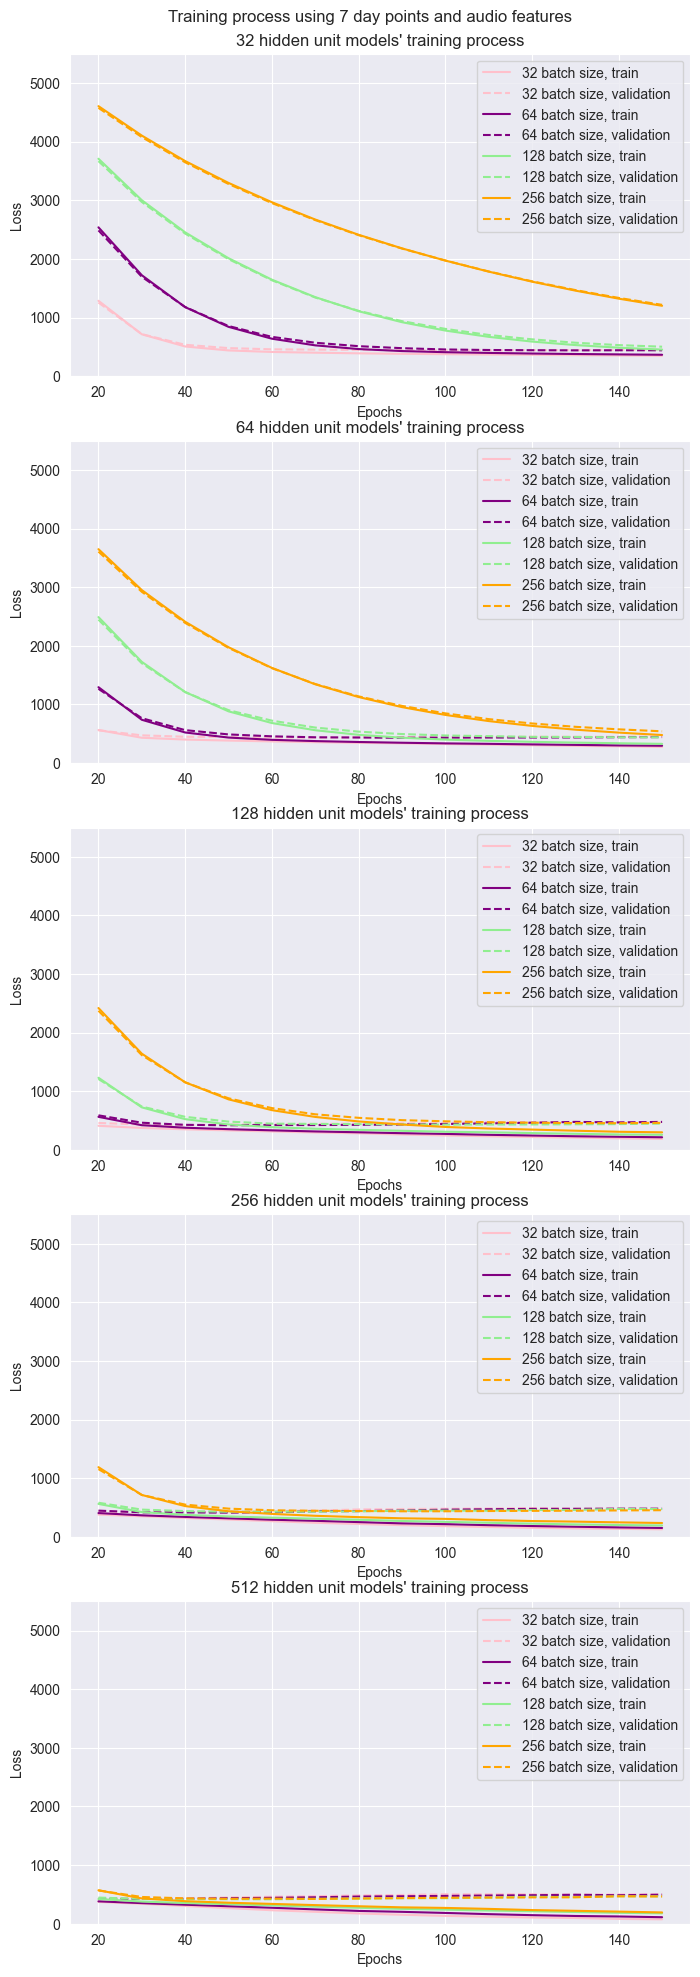

In [12]:
# Plot the training loss for Model 2
input_path = os.path.join("Data", "Hyperparameter_Search", 'hyperparameters_points_audio.csv')
output_file = "hyperparameters_points_audio_training.pdf"
output_path = os.path.join("report", "figures", output_file)
plot_training(input_path, output_path, "Training process using 7 day points and audio features")

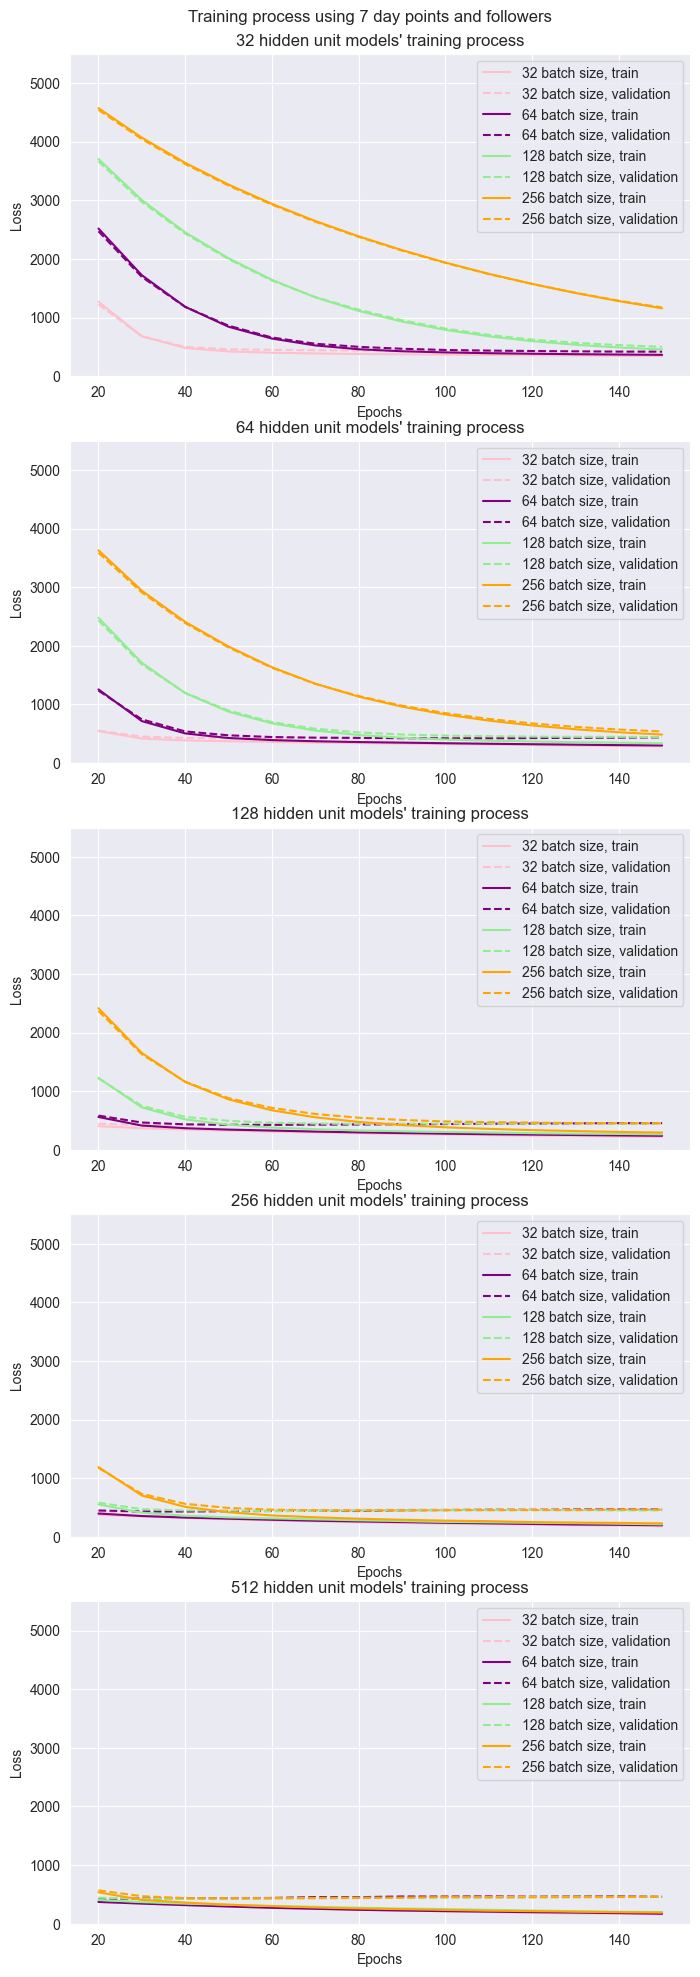

In [13]:
# Plot the training loss for Model 3
input_path = os.path.join("Data", "Hyperparameter_Search", 'hyperparameters_points_followers.csv')
output_file = "hyperparameters_points_followers_training.pdf"
output_path = os.path.join("report", "figures", output_file)
plot_training(input_path, output_path, "Training process using 7 day points and followers")

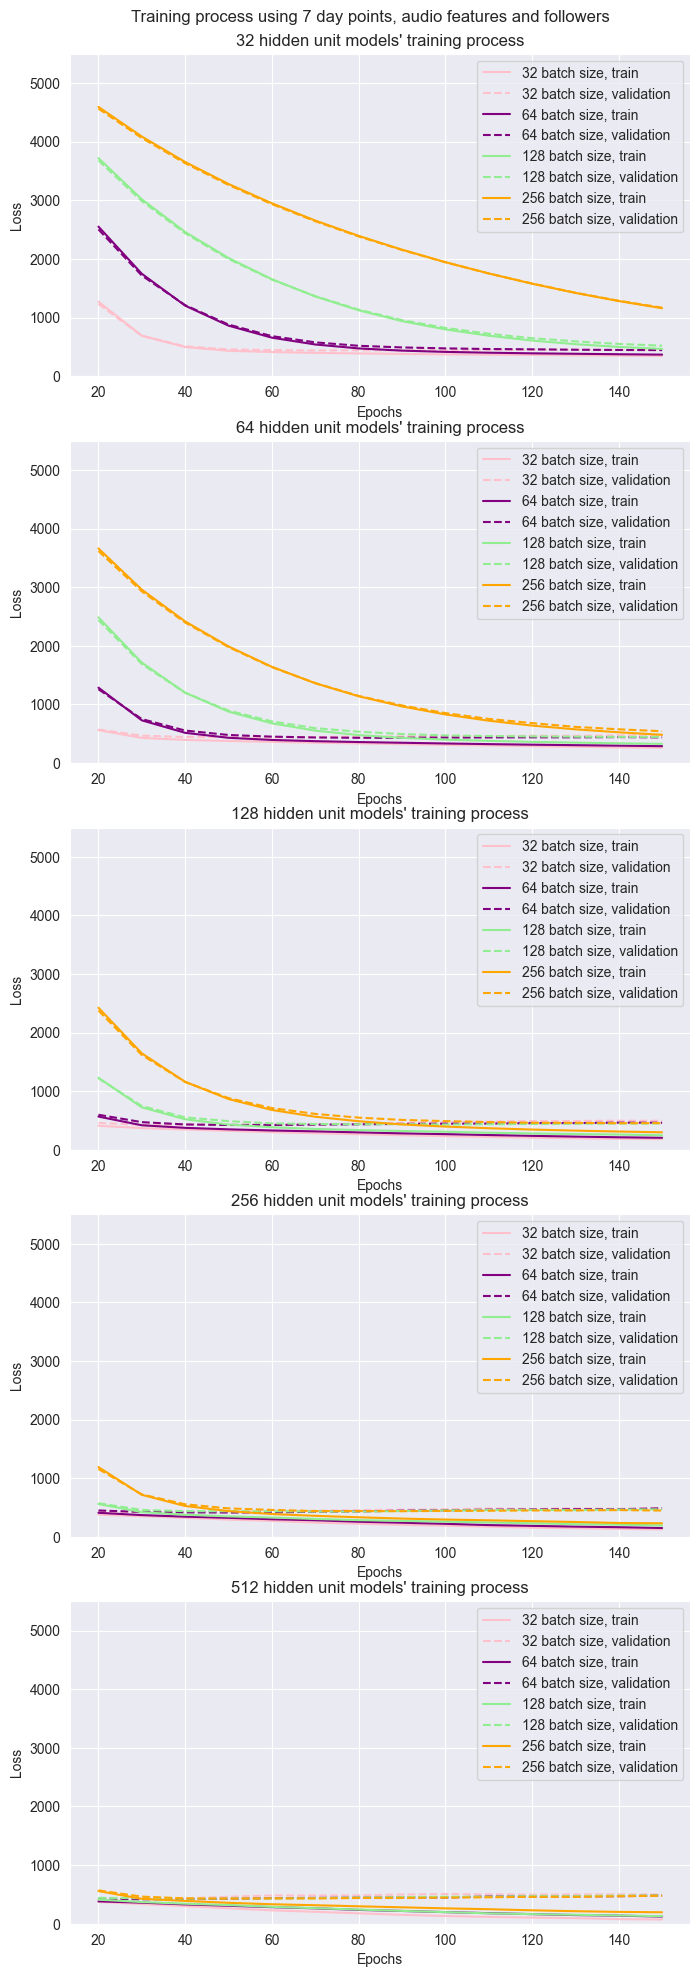

In [14]:
# Plot the training loss for Model 4
input_path = os.path.join("Data", "Hyperparameter_Search", 'hyperparameters_points_audio_followers.csv')
output_file = "hyperparameters_points_audio_followers_training.pdf"
output_path = os.path.join("report", "figures", output_file)
plot_training(input_path, output_path, "Training process using 7 day points, audio features and followers")